<a href="https://colab.research.google.com/github/JungleKiosk/sonneblume/blob/main/sonneblume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## caricamento del dataframe (.gpkg)

`pandas` è una libreria per la manipolazione e l'analisi dei dati, anche se in questa cella di codice non viene utilizzata direttamente, è comune importarla e anche perché `geopandas` è basata su pandas.



In [2]:
import pandas as pd
import geopandas as gpd

df = gpd.read_file('/content/drive/MyDrive/data/resa_girasole_2022.gpkg')

## Controllo del dataframe



*   Si nota che la colonna `Data/Ora` presenta un formato NON compatibile con i metodi di gestione della libreria `geopandas`, inoltre sarebbe preferibile dividerla in due vettori: `Data` e `Ora`.
*   I vettori `Longitudin` e `Latitudine` esprimono le coordinate con il separatore decimale NON compatibile con la libreria `geopandas`: andrebbe sostituita la `,` con il `.`.






In [39]:
df

Data/Ora  Longitudin  Latitudine  RESAKG  VELOCITA     AREA  \
0     5 set 2022, 10:08:09  11,9758245  44,8474908  1870.0      4.80  140.000   
1     5 set 2022, 10:08:24  11,9758157  44,8476751  1270.0      4.83  140.875   
2     5 set 2022, 10:08:40  11,9758154  44,8478795  1420.0      4.78  139.417   
3     5 set 2022, 10:08:55  11,9758209  44,8480593  2010.0      4.85  141.458   
4     5 set 2022, 10:09:10  11,9758201  44,8482443  1320.0      4.80  140.000   
...                    ...         ...         ...     ...       ...      ...   
1957  3 set 2022, 20:13:03  11,9757431  44,8480422  2260.0      4.77  139.125   
1958  3 set 2022, 20:13:19  11,9757395  44,8482399  2460.0      4.78  139.417   
1959  3 set 2022, 20:13:34  11,9757408  44,8484282  2330.0      4.78  139.417   
1960  3 set 2022, 20:13:49  11,9757414   44,848618  1950.0      4.99  145.542   
1961  3 set 2022, 20:14:05  11,9757344  44,8488297  1810.0      5.44  158.667   

      UMIDITA                         geometry  
0         NaN  POINT (1333142.685 5597543.903)  
1         NaN  POINT (1333141.706 5597572.841)  
2         NaN  POINT (1333141.672 5597604.934)  
3        33.1  POINT (1333142.284 5597633.165)  
4        33.1  POINT (1333142.195 5597662.213)  
...       ...                              ...  
1957     30.8  POINT (1333133.624 5597630.480)  
1958     24.6  POINT (1333133.223 5597661.522)  
1959     24.6  POINT (1333133.368 5597691.088)  
1960     24.6  POINT (1333133.435 5597720.889)  
1961     24.6  POINT (1333132.655 5597754.129)  

[1962 rows x 8 columns]

### Formattazione vettore Data/Ora

Per svolgere questa operazione si uso la libreria `pandas`, con lo scopo di creare un nuovo dataframe (`df2`) con data e ora formattati

1. Per dire a pandas che le date nel nostro df sono scritte in italiano, creo un **dizionario** chiamato `months_dict`, permettendole di identificare i nomi dei mesi in italiano ai corrispondenti nomi in inglese `'gen': 'Jan'`. Questo è necessario perché Python, nella conversione delle date, utilizza i nomi dei mesi in inglese.

2. Questa funzione prende una stringa di data `(date_str)` e sostituisce i nomi dei mesi in italiano con quelli in inglese utilizzando il dizionario months_dict.

3. `df = df.copy()` per evitare di modificare direttamente il DataFrame originale.

4. Converto tutte le voci della colonna `Data/Ora` in stringhe, con la funzione `replace_months` si sostituiscono i nomi dei mesi in italiano con quelli in inglese.

5. con `pd.to_datetime` di pandas per converto la colonna `Data/Ora` nel formato datetime di pandas. Il formato `%d %b %Y, %H:%M:%S` sarà letto da pandas e visibile nel df.

6. separo la data e l'orario definendo il **DataTYPE**
7. rimuovo la vecchia colonna `Data/Ora`



In [3]:
# dizionario
months_dict = {
    'gen': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'mag': 'May', 'giu': 'Jun',
    'lug': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'ott': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# def -> ricorda che usa replace !!!
def replace_months(date_str):
    for ita, eng in months_dict.items():
        date_str = date_str.replace(ita, eng)
    return date_str

df2 = df.copy()

df['Data/Ora'] = df['Data/Ora'].astype(str).apply(replace_months)

df['Data/Ora'] = pd.to_datetime(df['Data/Ora'], format='%d %b %Y, %H:%M:%S', errors='coerce') # errors='coerce' valori che non possono essere convertiti in NaT (Not a Time)

df['Data'] = df['Data/Ora'].dt.date
df['Ora'] = df['Data/Ora'].dt.time

df2 = df.drop(columns=['Data/Ora'])

df2


Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0     11,9758245  44,8474908  1870.0      4.80  140.000      NaN   
1     11,9758157  44,8476751  1270.0      4.83  140.875      NaN   
2     11,9758154  44,8478795  1420.0      4.78  139.417      NaN   
3     11,9758209  44,8480593  2010.0      4.85  141.458     33.1   
4     11,9758201  44,8482443  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957  11,9757431  44,8480422  2260.0      4.77  139.125     30.8   
1958  11,9757395  44,8482399  2460.0      4.78  139.417     24.6   
1959  11,9757408  44,8484282  2330.0      4.78  139.417     24.6   
1960  11,9757414   44,848618  1950.0      4.99  145.542     24.6   
1961  11,9757344  44,8488297  1810.0      5.44  158.667     24.6   

                             geometry        Data       Ora  
0     POINT (1333142.685 5597543.903)  2022-09-05  10:08:09  
1     POINT (1333141.706 5597572.841)  2022-09-05  10:08:24  
2     POINT (1333141.672 5597604.934)  2022-09-05  10:08:40  
3     POINT (1333142.284 5597633.165)  2022-09-05  10:08:55  
4     POINT (1333142.195 5597662.213)  2022-09-05  10:09:10  
...                               ...         ...       ...  
1957  POINT (1333133.624 5597630.480)  2022-09-03  20:13:03  
1958  POINT (1333133.223 5597661.522)  2022-09-03  20:13:19  
1959  POINT (1333133.368 5597691.088)  2022-09-03  20:13:34  
1960  POINT (1333133.435 5597720.889)  2022-09-03  20:13:49  
1961  POINT (1333132.655 5597754.129)  2022-09-03  20:14:05  

[1962 rows x 9 columns]

### Formattazione vettore coordinate

allo stesso modo con lo stesso concetto e funzione cambio il separatore decimale da `,` a `.`

In [4]:
# def -> ricorda che usa replace !!!
def replace_comma(value):
    if isinstance(value, str):
        return value.replace(',', '.')
    return value

df2['Latitudine'] = df2['Latitudine'].apply(replace_comma).astype(float)
df2['Longitudin'] = df2['Longitudin'].apply(replace_comma).astype(float)

df2

Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0      11.975824   44.847491  1870.0      4.80  140.000      NaN   
1      11.975816   44.847675  1270.0      4.83  140.875      NaN   
2      11.975815   44.847879  1420.0      4.78  139.417      NaN   
3      11.975821   44.848059  2010.0      4.85  141.458     33.1   
4      11.975820   44.848244  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957   11.975743   44.848042  2260.0      4.77  139.125     30.8   
1958   11.975739   44.848240  2460.0      4.78  139.417     24.6   
1959   11.975741   44.848428  2330.0      4.78  139.417     24.6   
1960   11.975741   44.848618  1950.0      4.99  145.542     24.6   
1961   11.975734   44.848830  1810.0      5.44  158.667     24.6   

                             geometry        Data       Ora  
0     POINT (1333142.685 5597543.903)  2022-09-05  10:08:09  
1     POINT (1333141.706 5597572.841)  2022-09-05  10:08:24  
2     POINT (1333141.672 5597604.934)  2022-09-05  10:08:40  
3     POINT (1333142.284 5597633.165)  2022-09-05  10:08:55  
4     POINT (1333142.195 5597662.213)  2022-09-05  10:09:10  
...                               ...         ...       ...  
1957  POINT (1333133.624 5597630.480)  2022-09-03  20:13:03  
1958  POINT (1333133.223 5597661.522)  2022-09-03  20:13:19  
1959  POINT (1333133.368 5597691.088)  2022-09-03  20:13:34  
1960  POINT (1333133.435 5597720.889)  2022-09-03  20:13:49  
1961  POINT (1333132.655 5597754.129)  2022-09-03  20:14:05  

[1962 rows x 9 columns]

# Analisi preliminare del df


### analisi descrittiva del df
Prima di cominciare l'elaborazione del df, ne controllo la distribuzione e le caratterisctiche.

1. `info()` è un metodo di pandas che stampa le informazioni di cui sopra.

2. `describe()` è un metodo che restituisce questo riepilogo statistico.

3. `isnull().sum()` prima crea un DataFrame/Series di valori booleani (True se il valore è null, altrimenti False) e poi somma i valori booleani per ogni colonna, restituendo il conteggio dei valori nulli.

4. conteggio dei valori nulli per la lunghezza totale del DataFrame `(len(df2))` e moltiplico per 100 per ottenere la percentuale.

5. calcolo le giornate di raccolta per ogni range temporale



In [5]:
print("🔸 Informazioni sul dataset:")
print(df2.info())# todo: vedi info() in R

print("🔸 Descrizione statistica delle colonne numeriche:")
print(df2.describe())# todo: vedi in R [tipo summary]

print("🔸 Controllo dei dati mancanti:")
missing_data = df2.isnull().sum()
print(missing_data)

print("🔸 Percentuale di dati mancanti per ogni colonna:")
missing_percentage = (missing_data / len(df2)) * 100
print(missing_percentage)

date_counts = df2['Data'].value_counts()
print(date_counts)

🔸 Informazioni sul dataset:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Longitudin  1962 non-null   float64 
 1   Latitudine  1962 non-null   float64 
 2   RESAKG      1962 non-null   float64 
 3   VELOCITA    1962 non-null   float64 
 4   AREA        1962 non-null   float64 
 5   UMIDITA     1925 non-null   float64 
 6   geometry    1962 non-null   geometry
 7   Data        1962 non-null   object  
 8   Ora         1962 non-null   object  
dtypes: float64(6), geometry(1), object(2)
memory usage: 138.1+ KB
None
🔸 Descrizione statistica delle colonne numeriche:
        Longitudin   Latitudine       RESAKG     VELOCITA         AREA  \
count  1962.000000  1962.000000  1962.000000  1962.000000  1962.000000   
mean     11.971261    44.848606  2255.285423     4.903976   143.032629   
std       0.004320     0.000848   699.827651     0.6

## Visualizzazione dei dati

Creo un istogramma e un boxplot per visualizzare rapidamente la distribuzione delle rese (`RESAKG`) e degli outliers:

Per elaborare il boxplot importo la libreria `matplotlib` e `Seaborn`, costruita su Matplotlib e fornisce un'API di alto livello per la visualizzazione dei dati.

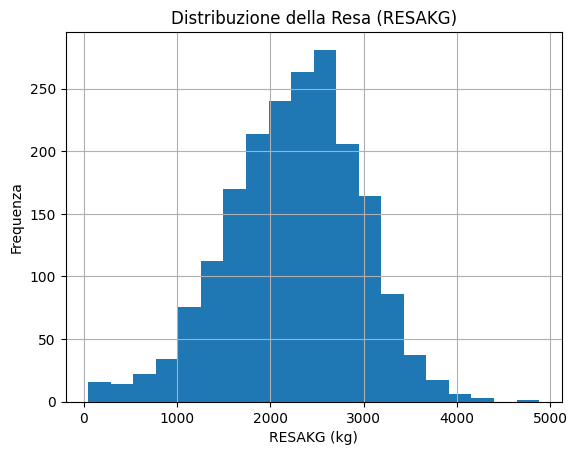

In [7]:
import matplotlib.pyplot as plt

df2['RESAKG'].hist(bins=20)
plt.title('Distribuzione della Resa (RESAKG)')
plt.xlabel('RESAKG (kg)')
plt.ylabel('Frequenza')
plt.show()


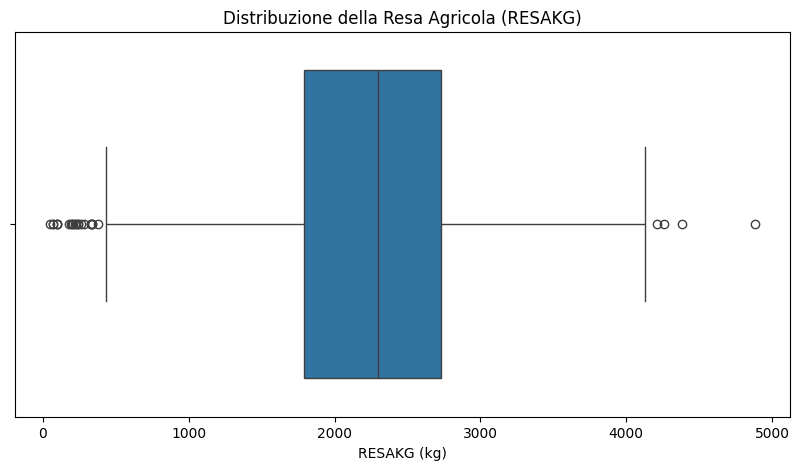

In [8]:
import seaborn as sns

# per sicurezza
df2['RESAKG'] = df2['RESAKG'].astype(float)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df2, x='RESAKG')
plt.title('Distribuzione della Resa Agricola (RESAKG)')
plt.xlabel('RESAKG (kg)')
plt.show()

In [9]:
Q1 = df2['RESAKG'].quantile(0.25)
Q3 = df2['RESAKG'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df2[(df2['RESAKG'] < lower_bound) | (df2['RESAKG'] > upper_bound)]

print("Outliers:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(outliers[['RESAKG', 'Data']])



Outliers:
Lower bound: 386.25
Upper bound: 4136.25
      RESAKG        Data
122    100.0  2022-09-05
123     70.0  2022-09-05
124    190.0  2022-09-05
125    340.0  2022-09-05
138    330.0  2022-09-05
141    260.0  2022-09-05
158    200.0  2022-09-05
171    210.0  2022-09-05
173    180.0  2022-09-05
178    280.0  2022-09-05
179    330.0  2022-09-05
211    240.0  2022-09-05
277    380.0  2022-09-05
311   4380.0  2022-09-05
351    100.0  2022-08-31
770    100.0  2022-09-03
771     50.0  2022-09-03
795    220.0  2022-09-03
872   4210.0  2022-09-03
873   4260.0  2022-09-03
945    340.0  2022-09-03
946    240.0  2022-09-03
947    230.0  2022-09-03
1059  4880.0  2022-09-03
1644    70.0  2022-09-03


## Mappatura delle date di raccolta 🌍

voglio raggruppare i giorni di raccolta in range temporali e mappare sull'appezzamento di interesse (AOI).

1. Per prima cosa è necessario installare una pacchetto apposito di Python che permette di usare la libreria `contextily`. questa libreria permette di georeferenziare primitive geometriche con coordinate in un determinato CRS(Coordinate Reference System).

2. importo la libreria `matplotlib.pyplot` per plottare i dati.

3. Uso `gpd.points_from_xy` per creare una "GeoSeries" di punti dalle colonne delle coordinate. Converto df2 in un GeoDataFrame utilizzando la GeoSeries di punti. Imposto il CRS: Controllo SE il GeoDataFrame ha già un CRS definito, SE NON lo ha, imposta qundi il CRS a EPSG:4326 (WGS 84), SE il CRS è già definito, lo trasforma in EPSG:4326.

4. Converto le date specifiche in formato datetime e filtro il GeoDataFrame per ottenere solo i dati relativi alle ai range temporali quindi alle date di riferimento (31 agosto, 3 settembre e 5 settembre).

5. con `plt.subplots ` creo il plot in asse cartesiano `ax`, plotto i punti di raccolta per ogni data specifica con colori diversi e aggiunge una legenda.

6. con `ctx.add_basemap` aggiungo una mappa di sfondo (`Esri.WorldImagery`) con un livello di zoom specificato. Il CRS della mappa di sfondo (provider) viene impostato in base al CRS del GeoDataFrame.

[altri sfondi: OpenStreetMap.Mapnik, CartoDB.Positro, Stamen.Terrain]

⚠️ ATTENZIONE: alcuni di questi providers potrebbero non funzionare
⚠️ NOTE: Esri.WorldImagery potrebbe essere sfuocato con zoom < 14










In [10]:
pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.1 MB/s eta 0:00:00


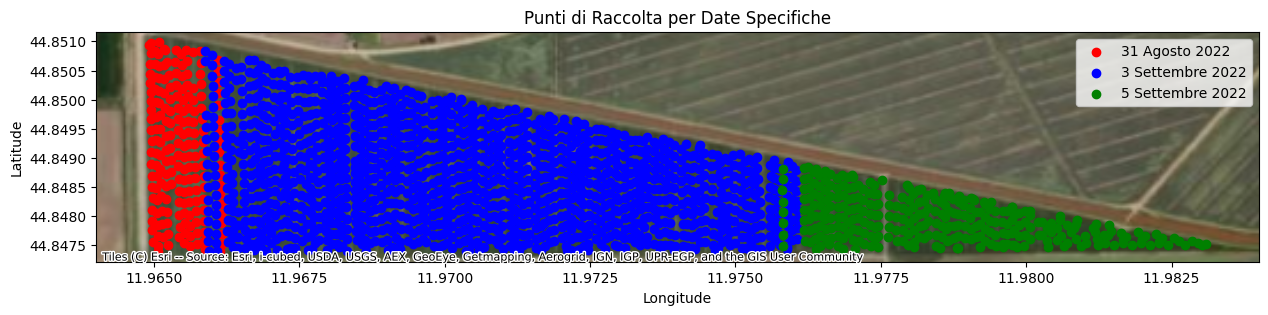

In [38]:
import matplotlib.pyplot as plt
import contextily as ctx

geometry = gpd.points_from_xy(df2['Longitudin'], df2['Latitudine'])
df2 = gpd.GeoDataFrame(df2, geometry=geometry)

# 🌍 il CRS del gpkg è 4326
if df2.crs is None:
    df2.set_crs(epsg=4326, inplace=True)
else:
    df2 = df2.to_crs(epsg=4326)

date1 = pd.to_datetime('2022-08-31')
date2 = pd.to_datetime('2022-09-03')
date3 = pd.to_datetime('2022-09-05')

data_31_agosto = df2[df2['Data'] == date1.date()]
data_3_settembre = df2[df2['Data'] == date2.date()]
data_5_settembre = df2[df2['Data'] == date3.date()]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

data_31_agosto.plot(ax=ax, marker='o', color='red', label='31 Agosto 2022')
data_3_settembre.plot(ax=ax, marker='o', color='blue', label='3 Settembre 2022')
data_5_settembre.plot(ax=ax, marker='o', color='green', label='5 Settembre 2022')

ctx.add_basemap(ax, crs=df2.crs, source=ctx.providers.Esri.WorldImagery, zoom=15)

plt.legend()
plt.title('Punti di Raccolta per Date Specifiche')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

ora è interessante plottare gli outliers sulla mappa per capire dove si collocano nello spazio

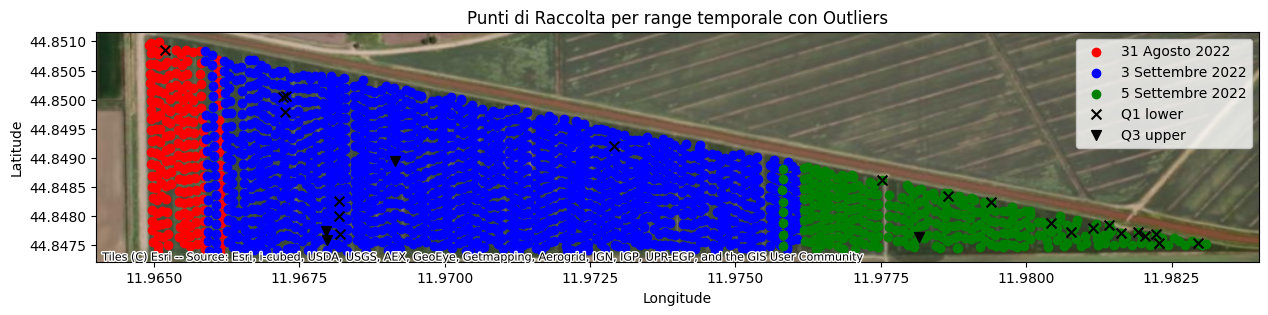

In [12]:
geometry = gpd.points_from_xy(df2['Longitudin'], df2['Latitudine'])
df2 = gpd.GeoDataFrame(df2, geometry=geometry)

if df2.crs is None:
    df2.set_crs(epsg=4326, inplace=True)  # usa EPSG:4326 come CRS predefinito

#-------outliers---------------------
Q1 = df2['RESAKG'].quantile(0.25)
Q3 = df2['RESAKG'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_lower = df2[df2['RESAKG'] < lower_bound]
outliers_upper = df2[df2['RESAKG'] > upper_bound]
#------------------------------------

date1 = pd.to_datetime('2022-08-31')
date2 = pd.to_datetime('2022-09-03')
date3 = pd.to_datetime('2022-09-05')

data_31_agosto = df2[df2['Data'] == date1.date()]
data_3_settembre = df2[df2['Data'] == date2.date()]
data_5_settembre = df2[df2['Data'] == date3.date()]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

data_31_agosto.plot(ax=ax, marker='o', color='red', label='31 Agosto 2022')
data_3_settembre.plot(ax=ax, marker='o', color='blue', label='3 Settembre 2022')
data_5_settembre.plot(ax=ax, marker='o', color='green', label='5 Settembre 2022')

outliers_lower.plot(ax=ax, marker='x', color='black',  label='Q1 lower', markersize=50)

outliers_upper.plot(ax=ax, marker='v', color='black',label='Q3 upper', markersize=50)

ctx.add_basemap(ax, crs=df2.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

plt.legend()
plt.title('Punti di Raccolta per range temporale con Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


## Visualizzazione delle relazione tra vettori

plotto i dati di resa e umidità (% di umidità degli acheni) in un grafico di relazione, quindi determinare la regressione lineare. Per determinare come la resa cambia al variare dell'umidità del prodotto.
Per elaborare queste analisi è necessaria le librerie `statsmodels` per l'analisi statistica `numpy` per le operazioni numeriche.


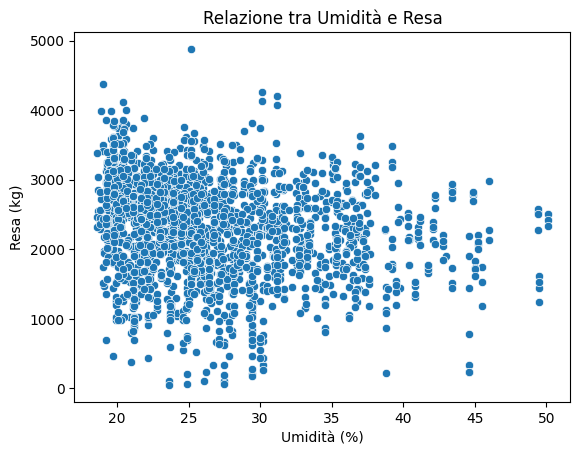

In [13]:
sns.scatterplot(data=df2, x='UMIDITA', y='RESAKG')
plt.title('Relazione tra Umidità e Resa')
plt.xlabel('Umidità (%)')
plt.ylabel('Resa (kg)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 RESAKG   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     58.94
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.57e-14
Time:                        18:57:47   Log-Likelihood:                -15316.
No. Observations:                1925   AIC:                         3.064e+04
Df Residuals:                    1923   BIC:                         3.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2785.3527     70.932     39.268      0.0

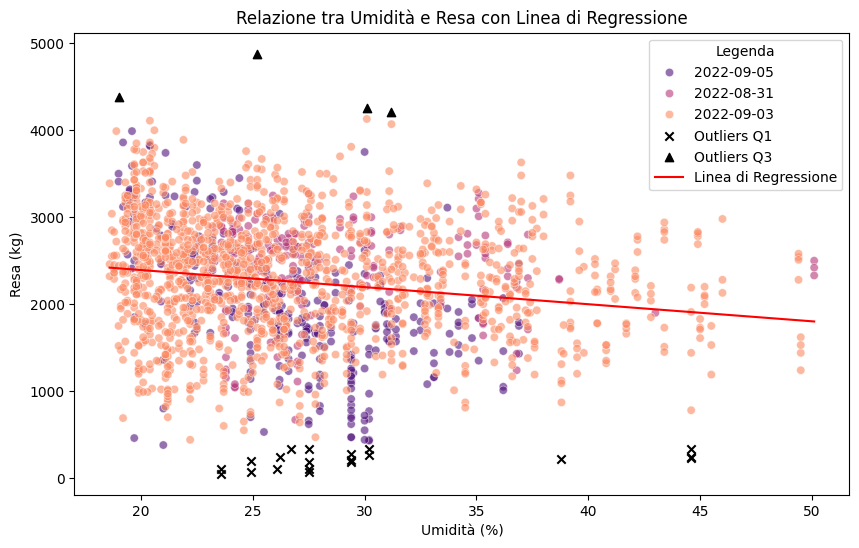

In [14]:
import statsmodels.api as sm
import numpy as np

df_filtered = df2[['UMIDITA', 'RESAKG', 'Data']].dropna()

numeric_cols = ['UMIDITA', 'RESAKG']
df_filtered = df_filtered[np.isfinite(df_filtered[numeric_cols]).all(1)]

#-------outliers---------------------
Q1 = df_filtered['RESAKG'].quantile(0.25)
Q3 = df_filtered['RESAKG'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_lower = df_filtered[df_filtered['RESAKG'] < lower_bound]
outliers_upper = df_filtered[df_filtered['RESAKG'] > upper_bound]
non_outliers = df_filtered[(df_filtered['RESAKG'] >= lower_bound) & (df_filtered['RESAKG'] <= upper_bound)]
#-----------------------------------

# Var ind e dip
X = df_filtered['UMIDITA']
y = df_filtered['RESAKG']

X = sm.add_constant(X) #todo: vedi intercetta in R

model = sm.OLS(y, X).fit()
print(model.summary())

X_pred = np.linspace(X['UMIDITA'].min(), X['UMIDITA'].max(), 100)
X_pred_df = pd.DataFrame({'UMIDITA': X_pred})
X_pred_df = sm.add_constant(X_pred_df)
y_pred = model.predict(X_pred_df)

plt.figure(figsize=(10, 6))

sns.scatterplot(data=non_outliers, x='UMIDITA', y='RESAKG', hue='Data', palette='magma', alpha=0.6)
#------outliers----------------------
plt.scatter(outliers_lower['UMIDITA'], outliers_lower['RESAKG'], color='black', marker='x', label='Outliers Q1')
plt.scatter(outliers_upper['UMIDITA'], outliers_upper['RESAKG'], color='black', marker='^', label='Outliers Q3')
#------------------------------------

plt.plot(X_pred, y_pred, label='Linea di Regressione', color='red')

plt.xlabel('Umidità (%)')
plt.ylabel('Resa (kg)')
plt.title('Relazione tra Umidità e Resa con Linea di Regressione')
plt.legend(title='Legenda')
plt.show()


# Interpolazione


per identificare le zone con maggiore o minore resa elaboro una interpolazione geostatistica. La resa media di una buona coltivazone di Girasole si aggira tra i 20-25 quintali, in condizioni molto favorevoli di può arrivare a 35-40 quintali.

## IDW (Inverse Distance Weighting)

è una tecnica usata per stimare valori sconosciuti in una mappa a partire da punti di dati conosciuti, pesando i punti vicini in base alla distanza.

Si parte da valori noti e si stimano i punti sconosciuti attraverso l'interpolazione.
L'interpolazione IDW **presuppone che i valori più vicini siano più correlati di quelli più lontani**.

Il concetto base è che i punti vicini sono più simili di quelli lontani:
esempio: è più probabile che piova a 1 metro di distanza rispetto a 3000 metri. (autocorrelazione -> base matematica)

Nell'esempio seguente, i punti rossi hanno valori di elevazione noti. Gli altri punti saranno interpolati. Se si desidera misurare il punto viola, è possibile impostare l'interpolazione in modo che prenda un numero fisso o variabile di punti. In questo esempio, viene utilizzato un numero fisso di punti pari a 3 e vengono utilizzati i tre punti più vicini.





## potenza in IDW

Se si ha una potenza di 1, la superficie interpolata viene smussata.

esempio:
((12/350) + (10/750) + (10/850)) / ((1/350) + (1/750) + (1/850)) = 11.1

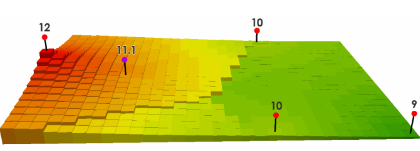

Una potenza di 2 aumenta l'influenza complessiva sui valori noti. Si può notare come i picchi e i valori siano più localizzati e non vengano mediati come con una potenza di 1.

esempio: ((12/3502) + (10/7502) + (10/8502)) / ((1/3502) + (1/7502) + (1/8502)) = 11.4


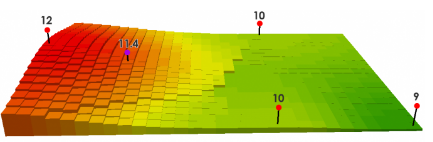

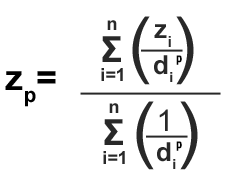

## setting IDW

1. importo le librerie necessarie: `cKDTree` e `griddata` da `scipy` per l'interpolazione.

2. La funzione idw_interpolation prende tre array (x, y, z) che rappresentano rispettivamente le coordinate e i valori della resa agricola. La funzione esegue i seguenti passi:
  *   imposto la potenza a 2 `power=2`
  *   Creazione di una Griglia: con `np.meshgrid` creouna griglia regolare di punti che copre l'intero intervallo dei dati.
  *   Interpolazione Cubica: griddata esegue l'interpolazione sui punti della griglia utilizzando il metodo 'cubic', generando così la mappa interpolata `grid_z`.





## perchè IDW e non Kriging???

in questo caso l'IDW fornisce una discretizzazione maggiore rispetto al Kriging (a parità di classi definite), ciò consete di svolgere analisi raster più precise.
esempio: estrarre in shape file le aree sotto la resa media per la determinara coltura, in modo da poter creare le relative mappe di prescrizione.
Di seguito alcune immagini di esempio e il confronto tra IDW e Krigging:

IDW power=2

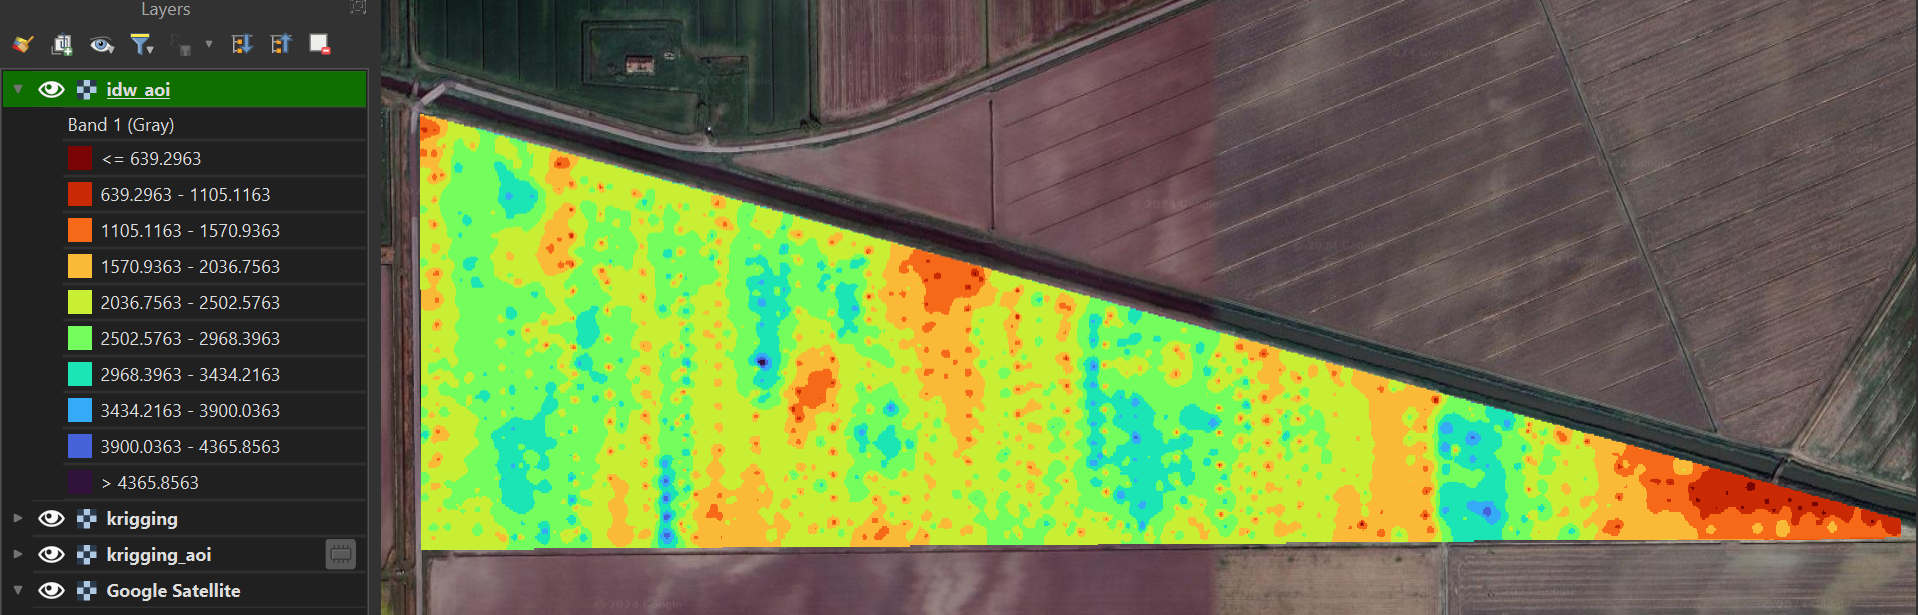

Kriging 2.26

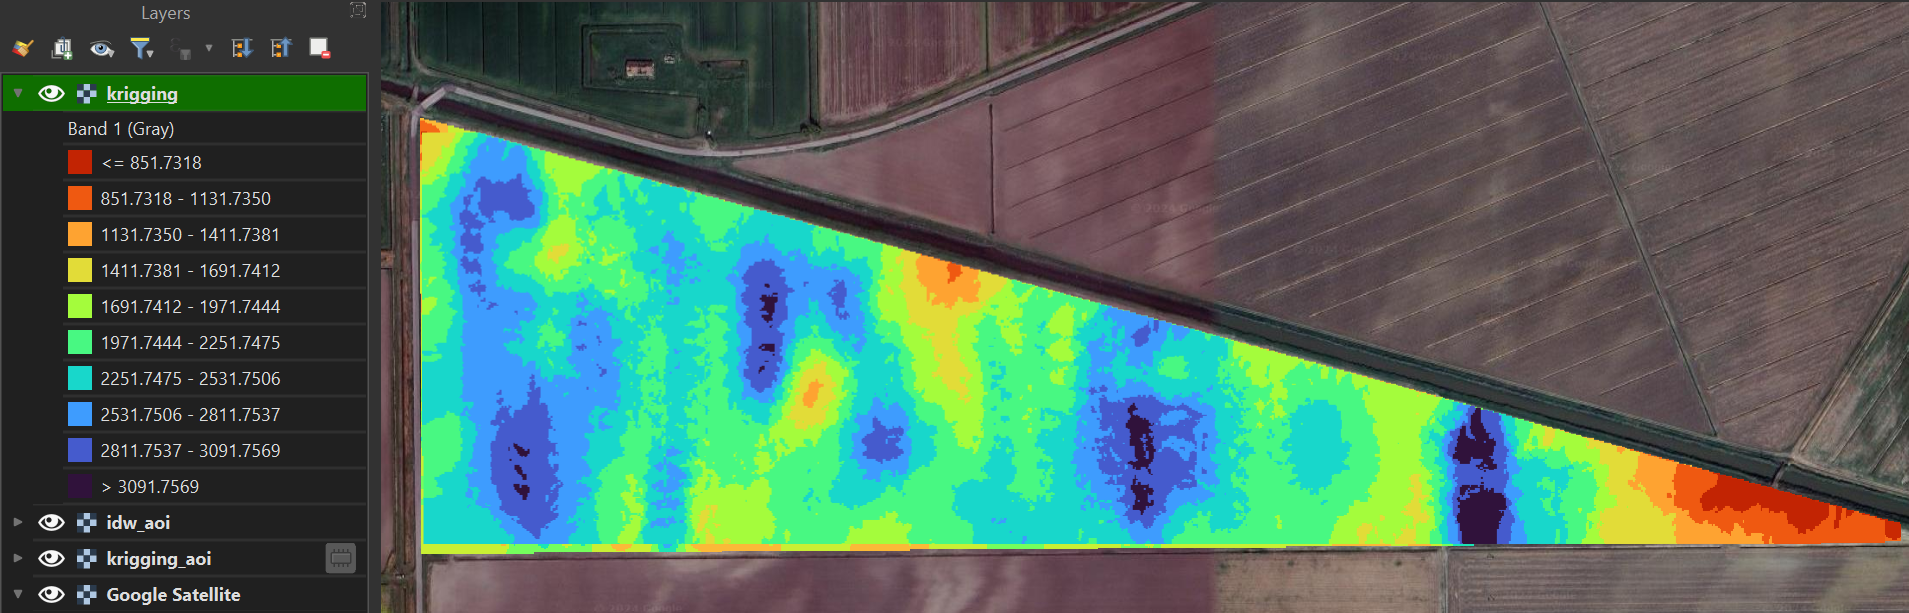

identificazione delle zone con meno resa e relativa vettorizzazione

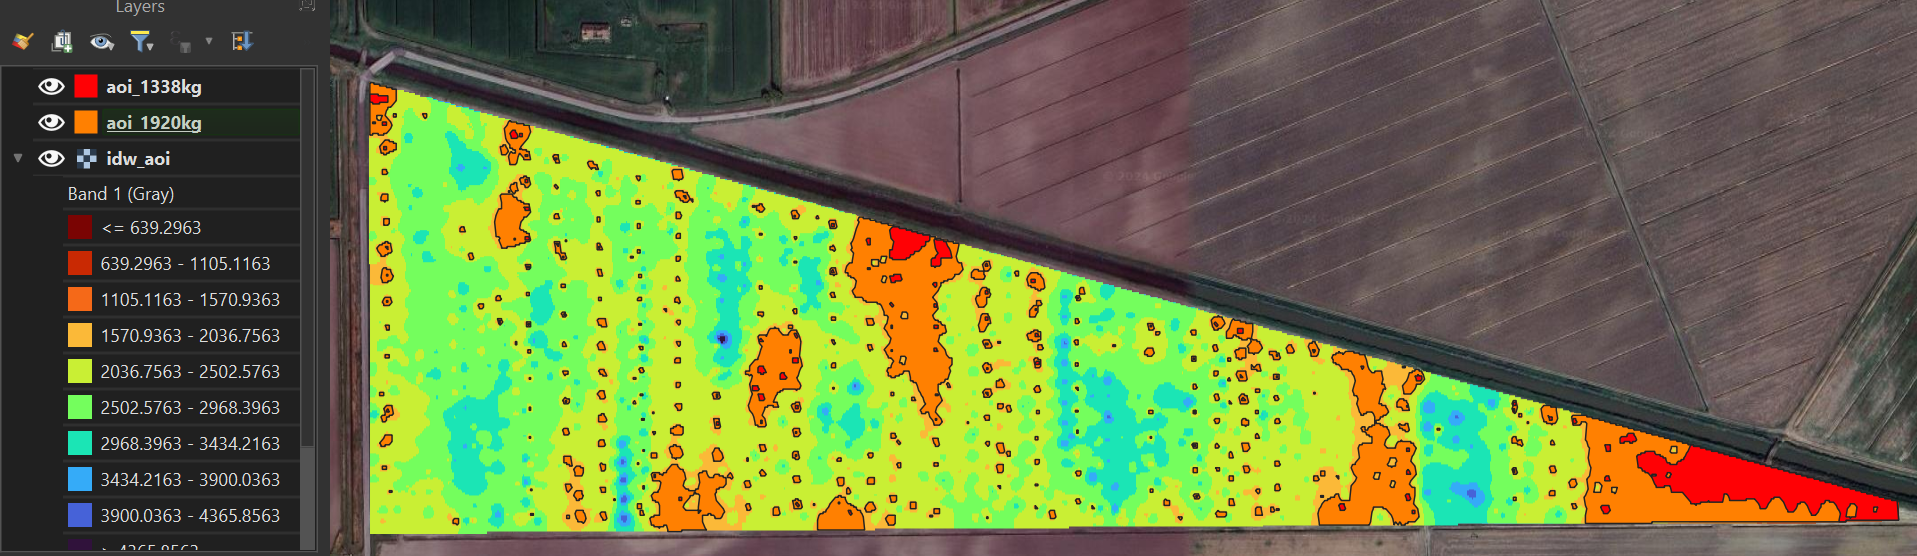

da shp a kpm e visualizzazione in Google Earth Pro

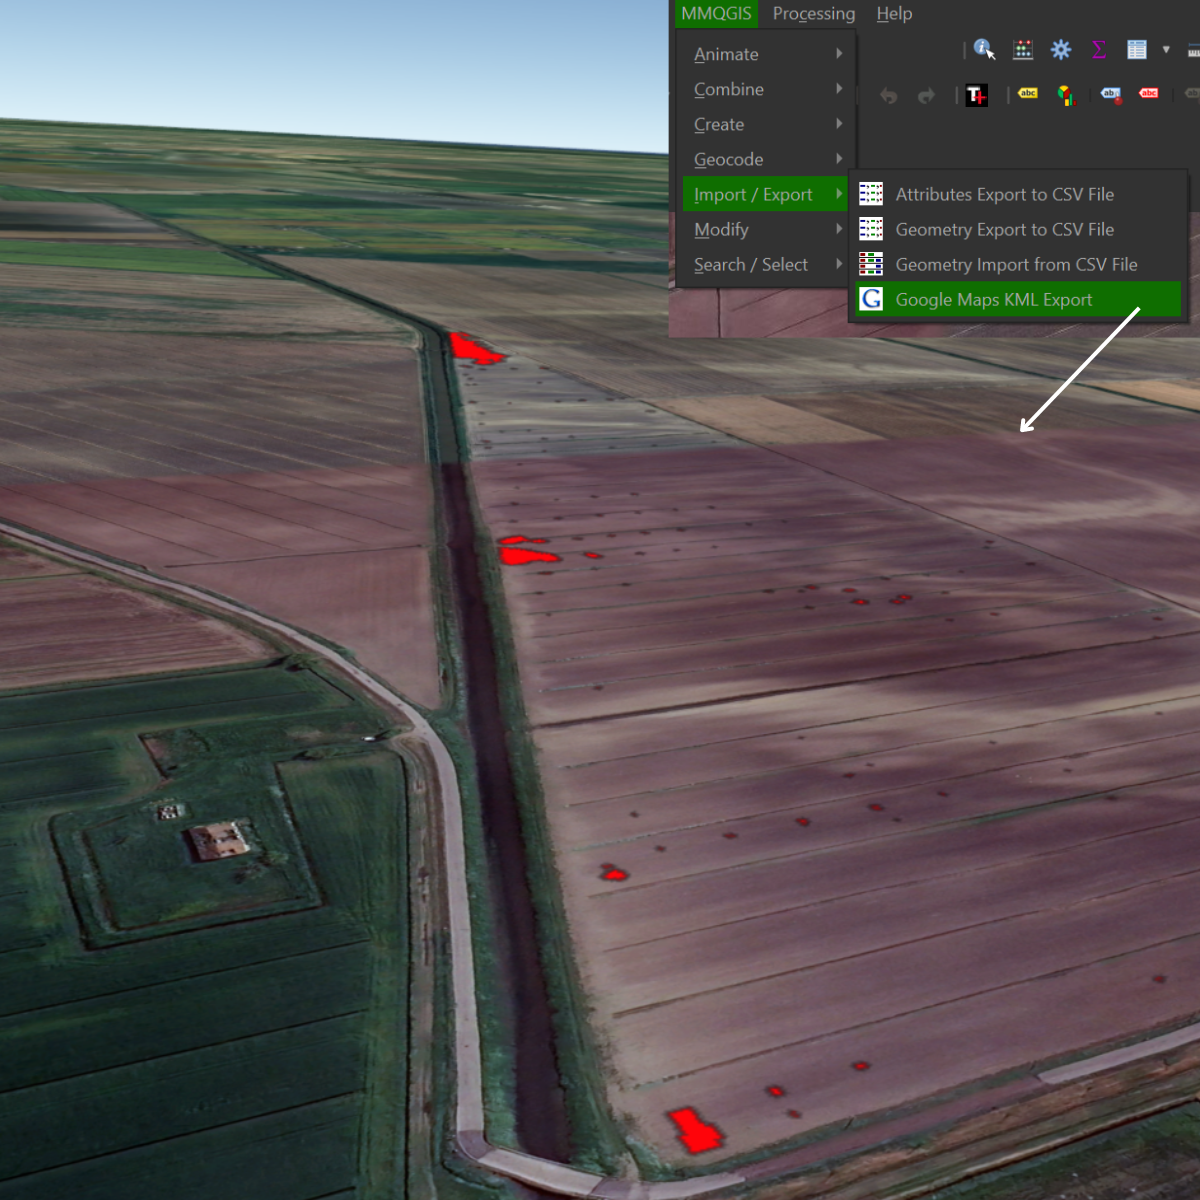

## calcolo IDW

In [15]:
pip install scipy

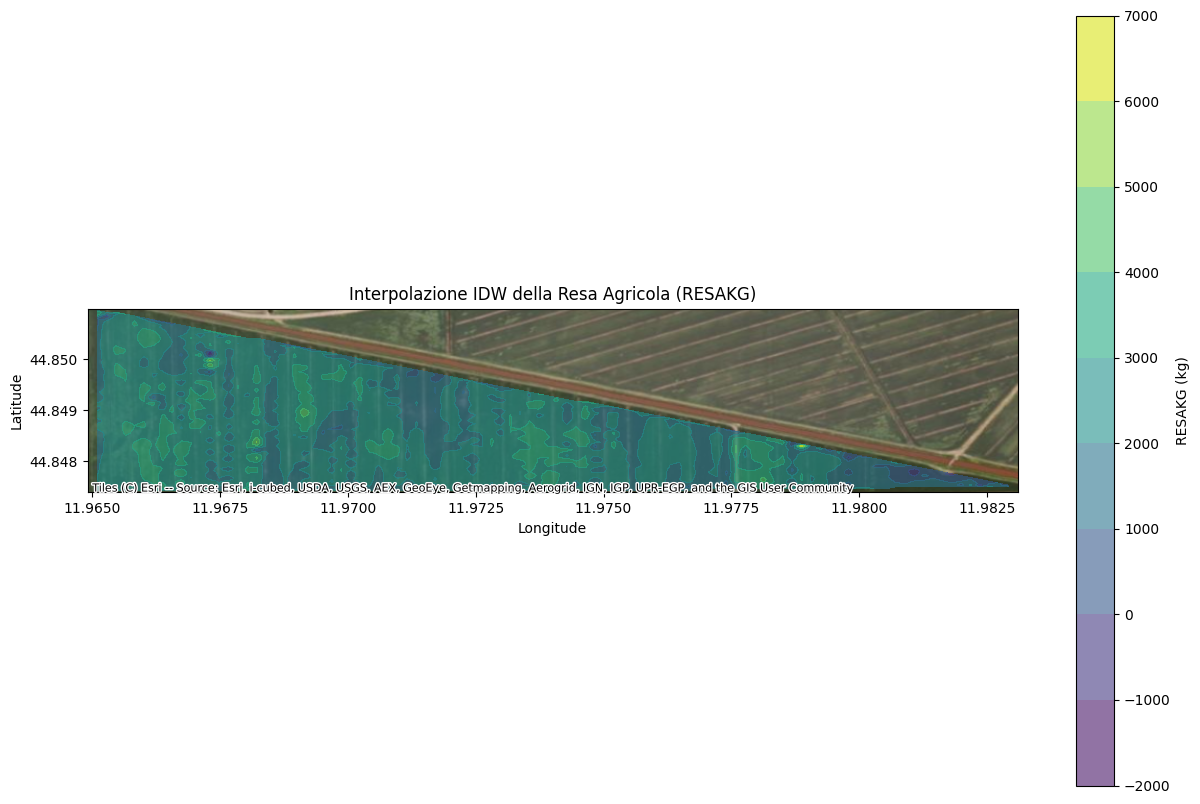

In [16]:
from scipy.spatial import cKDTree
from scipy.interpolate import griddata

x = df2['Longitudin'].values
y = df2['Latitudine'].values
z = df2['RESAKG'].values

def idw(x, y, z, resolution=100, power=2):
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), resolution),
        np.linspace(y.min(), y.max(), resolution)
    )
    grid_z = griddata(
        np.vstack((x, y)).T,
        z,
        (grid_x, grid_y),
        method='cubic'
    )
    return grid_x, grid_y, grid_z

grid_x, grid_y, grid_z = idw(x, y, z)# idw corre in console

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

contour = ax.contourf(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.6)

ctx.add_basemap(ax, crs=df2.crs.to_string(), source=ctx.providers.Esri.WorldImagery)#todo: solito scazzo della mappa sfuocata

plt.colorbar(contour, ax=ax, label='RESAKG (kg)')
plt.title('Interpolazione IDW della Resa Agricola (RESAKG)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

#todo: corre ma capire xkè il WARNING
#WARNING:matplotlib.legend:No artists with labels found to put in legend.
#Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

# NDVI

La fenologia agronomica del Girasole (che poi combacia con quella botanica dato che il prodotto viene colto quando la pianta si secca/muore in pieno campo ) è compresa nel range temporale tra marzo/aprile e agosto/settembre (cv precoci o tardive che siano).

Un modo per analizzare la vigoria vegetale in un periodo di interesse agricolo, è di calcolare l'indice vegetazionale NDVI.

Questo indice si addice molto bene alle analizi agricole, per la rilevazione della produttività in termini di controllo dello stato vegetativo delle colture (stress abiotici e biotici: stress idrici, botritys, clorosi, oidio, ruggine helianthi...).


https://www.indexdatabase.de/db/i.php

https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index

Fenologia *Helianthus annuus L*

nb: S.S. t/ha indica la sostanza secca totale e non la resa (NON SOLO gli ACHENI)

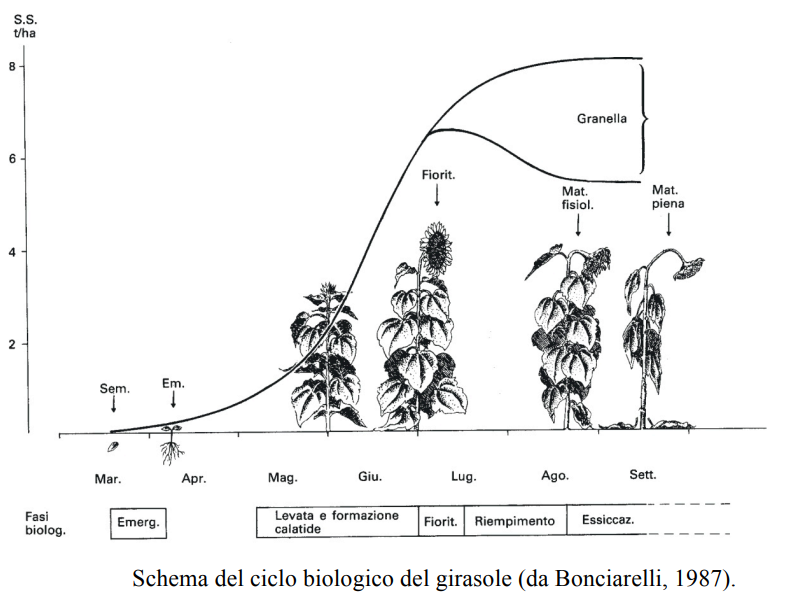

## Calcolo NDVI

il calco dell'indice NDVI da console Py è un pochino triky:

1. installare il pacchetto `geemap`
2. creare una repo GEE in Google Cloud
3. autenticarsi `ee.Authenticate()`
4. inizializzare la repo `ee.Initialize(project='ee-esofra24')`



In [17]:
pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00


NDVI medio (2022-04-01 to 2022-05-31): 0.10566350117715408
NDVI medio (2022-05-01 to 2022-06-30): 0.1818533457955499
NDVI medio (2022-06-01 to 2022-07-31): 0.3096372061084425
NDVI medio (2022-08-01 to 2022-09-30): 0.11454098228874408


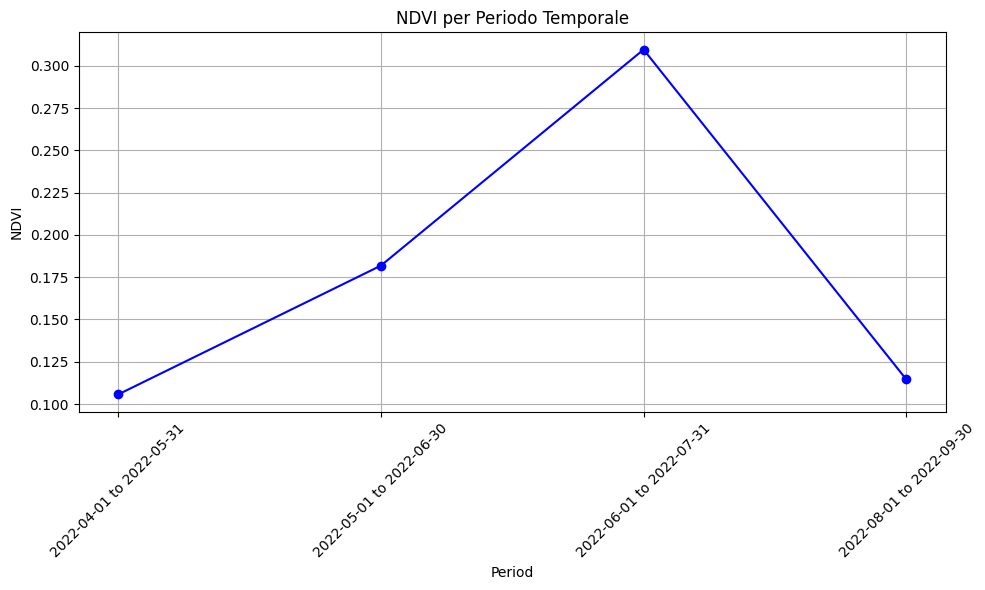

Map(center=[44.84863120164886, 11.971099992884453], controls=(WidgetControl(options=['position', 'transparent_…

In [21]:
import ee
import geemap

ee.Authenticate()
ee.Initialize(project='ee-esofra24')

def ndvi(image):
    ndvi = image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')# NDVI = (Band 5 – Band 4) / (Band 5 + Band 4)
    return image.addBands(ndvi)

# aoi - todo: prova geometry(.shp)
aoi = ee.Geometry.Polygon(df2.geometry.unary_union.convex_hull.exterior.coords[:])

periods = [
    ('2022-04-01', '2022-05-31'), # Semina - emergenza
    ('2022-05-01', '2022-06-30'), # Levata - bottone
    ('2022-06-01', '2022-07-31'), # Fioritura - sink
    ('2022-08-01', '2022-09-30')  # Seccume
]


ndvi_values = {} # dizionario vuoto

Map = geemap.Map()

for start_date, end_date in periods:
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(aoi) \
        .map(ndvi)

    ndvi_image = landsat.mean().select('NDVI')
    ndvi_clipped = ndvi_image.clip(aoi)

    ndvi_field = ndvi_clipped.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=aoi,
        scale=30
    )

    ndvi_value = ndvi_field.getInfo()['NDVI']
    ndvi_values[f'{start_date} to {end_date}'] = ndvi_value

    Map.addLayer(ndvi_clipped, {'min': 0, 'max': 1, 'palette': ['red', 'yellow', 'green']}, f'NDVI {start_date} to {end_date}')

    print(f'NDVI medio ({start_date} to {end_date}):', ndvi_value)

#dizionario pieno
ndvi_df = pd.DataFrame(list(ndvi_values.items()), columns=['Period', 'NDVI'])

plt.figure(figsize=(10, 6))
plt.plot(ndvi_df['Period'], ndvi_df['NDVI'], marker='o', linestyle='-', color='b')
plt.xlabel('Period')
plt.ylabel('NDVI')
plt.title('NDVI per Periodo Temporale')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Map.centerObject(aoi, 15)

Map


In [22]:
    # Esporta i rsaterNDvi sul mio Google Drive
    #task = ee.batch.Export.image.toDrive(
       # image=ndvi_clipped,
       # description=f'NDVI_{start_date}_to_{end_date}',
       # folder='EarthEngineImages',
       # scale=30,
       # region=region,
       # fileFormat='GeoTIFF'
   # )
    #task.start()

# Produttività e Consumi

Potrebbe essere interessante calcolare la produttività oraria e interpolare i consumi di carburante per tonnellata di prodotto raccolto.

Il monitoraggio dei consumi risulta utile al miglioramento produttivo aziendale e alla realizzazione di mapper di sostenibilità ambientale ed economica.


⚠️ nel codice seguente ho dovuto ricaricare e ripulire il dataframe altrimenti mi dava una serie di errori a catena che non comprendo

## Produttività oraria

          Data  Ora  RESAMG  Productivity
0   2022-08-31   16  172.18        172.18
1   2022-08-31   17  285.27        285.27
2   2022-09-03   10    5.41          5.41
3   2022-09-03   11  296.66        296.66
4   2022-09-03   12  361.28        361.28
5   2022-09-03   13  277.39        277.39
6   2022-09-03   14  384.73        384.73
7   2022-09-03   15  398.60        398.60
8   2022-09-03   16  386.45        386.45
9   2022-09-03   17  349.45        349.45
10  2022-09-03   18  422.71        422.71
11  2022-09-03   19  390.27        390.27
12  2022-09-03   20   86.86         86.86
13  2022-09-05   10  224.63        224.63
14  2022-09-05   11  222.71        222.71
15  2022-09-05   12  160.27        160.27
         Data  Productivity
0  2022-08-31    228.725000
1  2022-09-03    305.437273
2  2022-09-05    202.536667


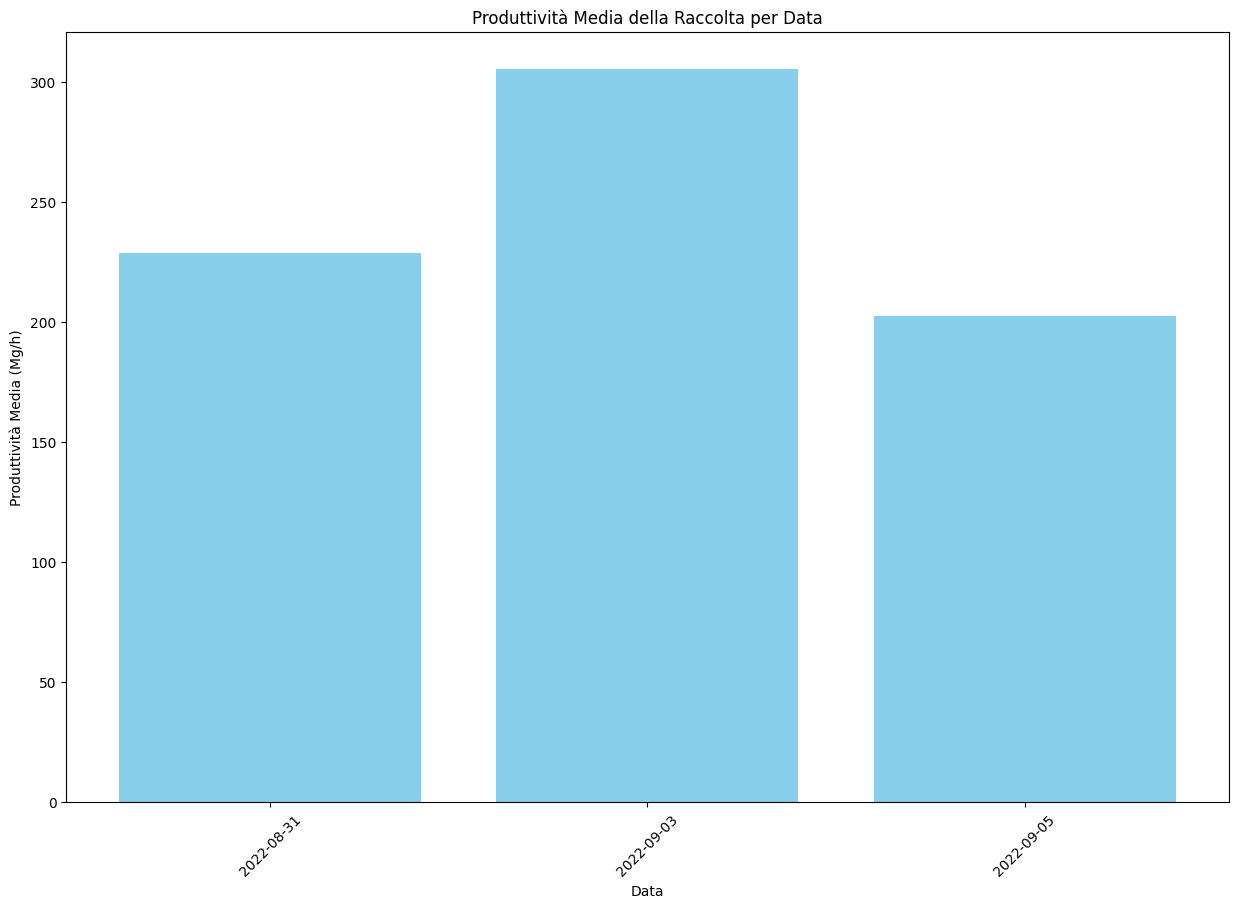

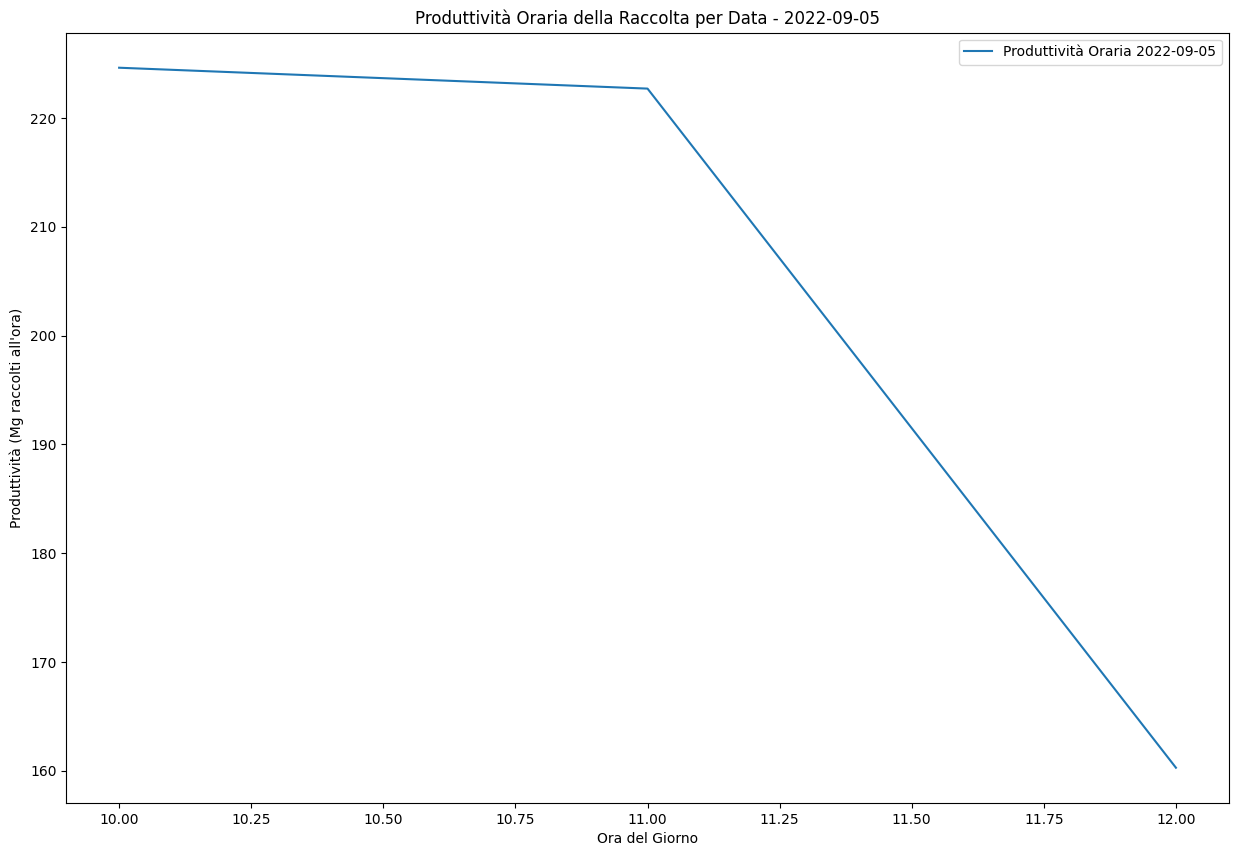

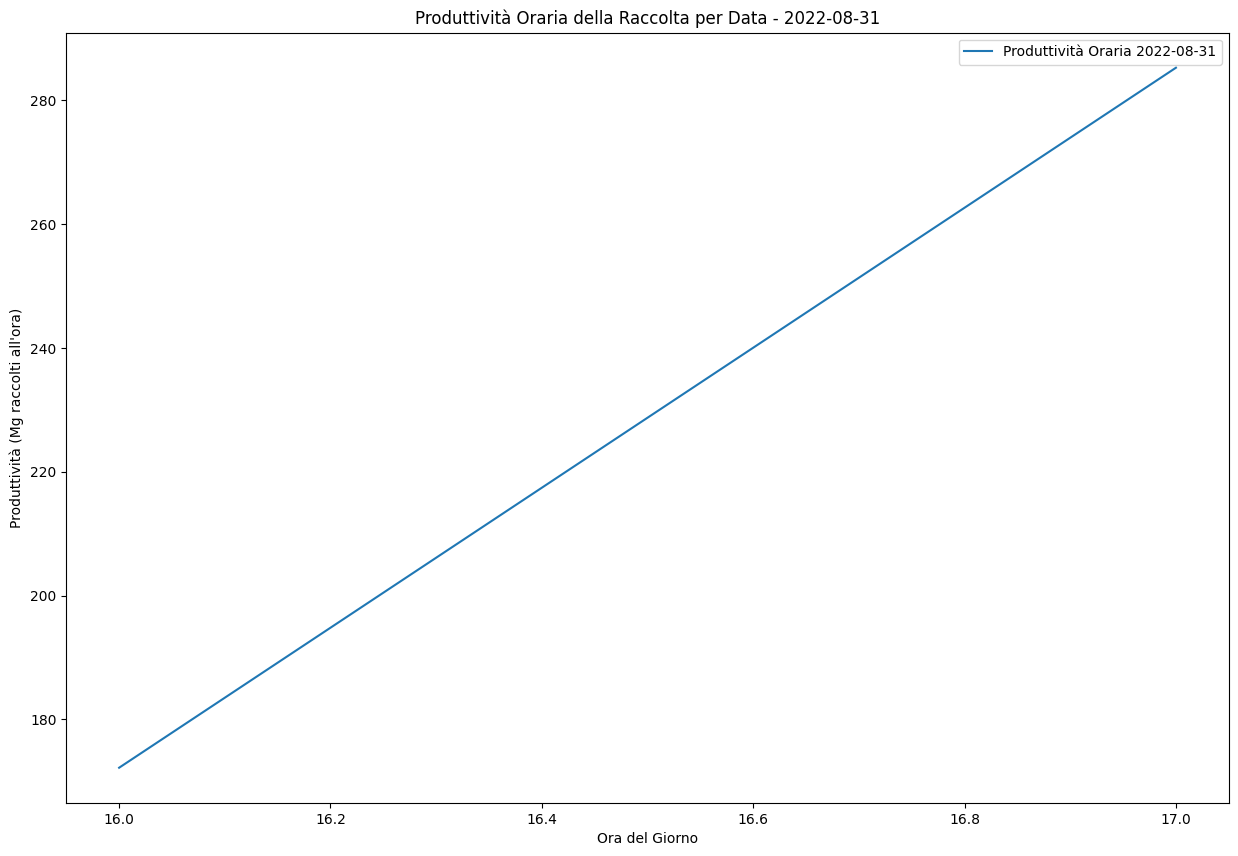

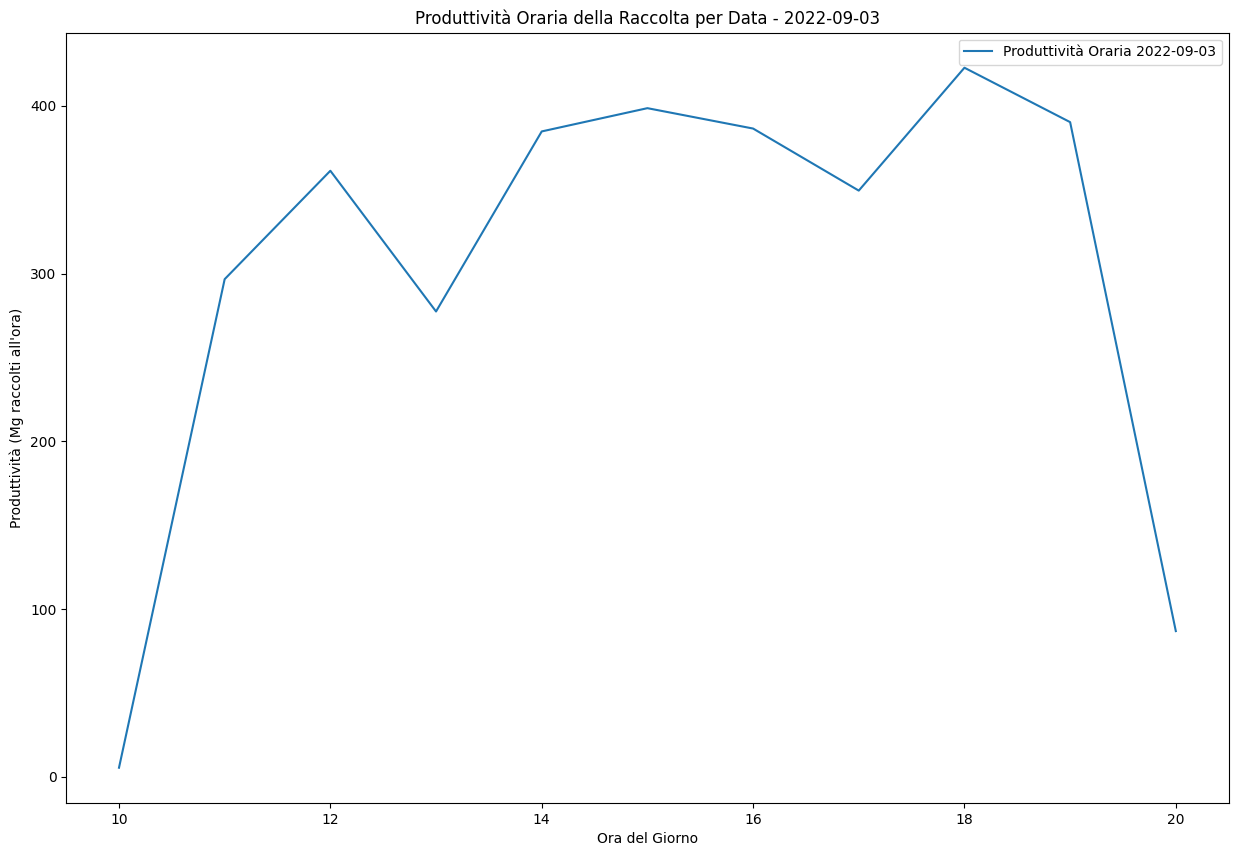

    Ora  Productivity
0    10       115.020
1    11       259.685
2    12       260.775
3    13       277.390
4    14       384.730
5    15       398.600
6    16       279.315
7    17       317.360
8    18       422.710
9    19       390.270
10   20        86.860


In [23]:
file_path = '/content/drive/MyDrive/data/resa_girasole_2022.gpkg'
df3 = gpd.read_file(file_path)

df3['Longitudin'] = df3['Longitudin'].astype(str).str.replace(',', '.').astype(float)
df3['Latitudine'] = df3['Latitudine'].astype(str).str.replace(',', '.').astype(float)

months_dict = {
    'gen': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'mag': 'May', 'giu': 'Jun',
    'lug': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'ott': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

def replace_months(date_str):
    for ita, eng in months_dict.items():
        date_str = date_str.replace(ita, eng)
    return date_str

df3['Data/Ora'] = df3['Data/Ora'].astype(str).apply(replace_months)

df3['Data/Ora'] = pd.to_datetime(df3['Data/Ora'], format='%d %b %Y, %H:%M:%S', errors='coerce')

df3['Data'] = df3['Data/Ora'].dt.date
df3['Ora'] = df3['Data/Ora'].dt.time

df3 = df3.drop(columns=['Data/Ora'])

# da kg a tonnellate (megagrammi)
df3['RESAMG'] = df3['RESAKG'] / 1000

def calculate_average_hourly_productivity(df3):
    df3['Ora'] = pd.to_datetime(df3['Ora'].astype(str)).dt.hour
    hourly_productivity = df3.groupby(['Data', 'Ora'])['RESAMG'].sum().reset_index()
    hourly_productivity['Productivity'] = hourly_productivity['RESAMG']
    # Merge cols
    df3 = df3.merge(hourly_productivity[['Data', 'Ora', 'Productivity']], on=['Data', 'Ora'], how='left')
    return df3, hourly_productivity

# corre per la prod/h
df3, hourly_productivity = calculate_average_hourly_productivity(df3)
print(hourly_productivity)

date_groups = hourly_productivity.groupby('Data')['Productivity'].mean().reset_index()
print(date_groups)

plt.figure(figsize=(15, 10))
plt.bar(date_groups['Data'].astype(str), date_groups['Productivity'], color='skyblue')
plt.xlabel('Data')
plt.ylabel('Produttività Media (Mg/h)')
plt.title('Produttività Media della Raccolta per Data')
plt.xticks(rotation=45)
plt.show()

dates = df3['Data'].unique()
for date in dates:
    daily_productivity = hourly_productivity[hourly_productivity['Data'] == date]
    plt.figure(figsize=(15, 10))
    plt.plot(daily_productivity['Ora'], daily_productivity['Productivity'], label=f'Produttività Oraria {date}')
    plt.xlabel('Ora del Giorno')
    plt.ylabel('Produttività (Mg raccolti all\'ora)')
    plt.title(f'Produttività Oraria della Raccolta per Data - {date}')
    plt.legend()
    plt.show()

average_hourly_productivity = hourly_productivity.groupby('Ora')['Productivity'].mean().reset_index()
print(average_hourly_productivity)

In [116]:
df3

Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0      11.975824   44.847491  1870.0      4.80  140.000      NaN   
1      11.975816   44.847675  1270.0      4.83  140.875      NaN   
2      11.975815   44.847879  1420.0      4.78  139.417      NaN   
3      11.975821   44.848059  2010.0      4.85  141.458     33.1   
4      11.975820   44.848244  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957   11.975743   44.848042  2260.0      4.77  139.125     30.8   
1958   11.975739   44.848240  2460.0      4.78  139.417     24.6   
1959   11.975741   44.848428  2330.0      4.78  139.417     24.6   
1960   11.975741   44.848618  1950.0      4.99  145.542     24.6   
1961   11.975734   44.848830  1810.0      5.44  158.667     24.6   

                             geometry        Data  Ora  RESAMG  Productivity  
0     POINT (1333142.685 5597543.903)  2022-09-05   10    1.87        224.63  
1     POINT (1333141.706 5597572.841)  2022-09-05   10    1.27        224.63  
2     POINT (1333141.672 5597604.934)  2022-09-05   10    1.42        224.63  
3     POINT (1333142.284 5597633.165)  2022-09-05   10    2.01        224.63  
4     POINT (1333142.195 5597662.213)  2022-09-05   10    1.32        224.63  
...                               ...         ...  ...     ...           ...  
1957  POINT (1333133.624 5597630.480)  2022-09-03   20    2.26         86.86  
1958  POINT (1333133.223 5597661.522)  2022-09-03   20    2.46         86.86  
1959  POINT (1333133.368 5597691.088)  2022-09-03   20    2.33         86.86  
1960  POINT (1333133.435 5597720.889)  2022-09-03   20    1.95         86.86  
1961  POINT (1333132.655 5597754.129)  2022-09-03   20    1.81         86.86  

[1962 rows x 11 columns]

## Consumi per megagrammo raccolta (L/Mg)

         Data  Fuel_L/Mg
0  2022-08-31   2.768776
1  2022-09-03   2.655520
2  2022-09-05   2.204263


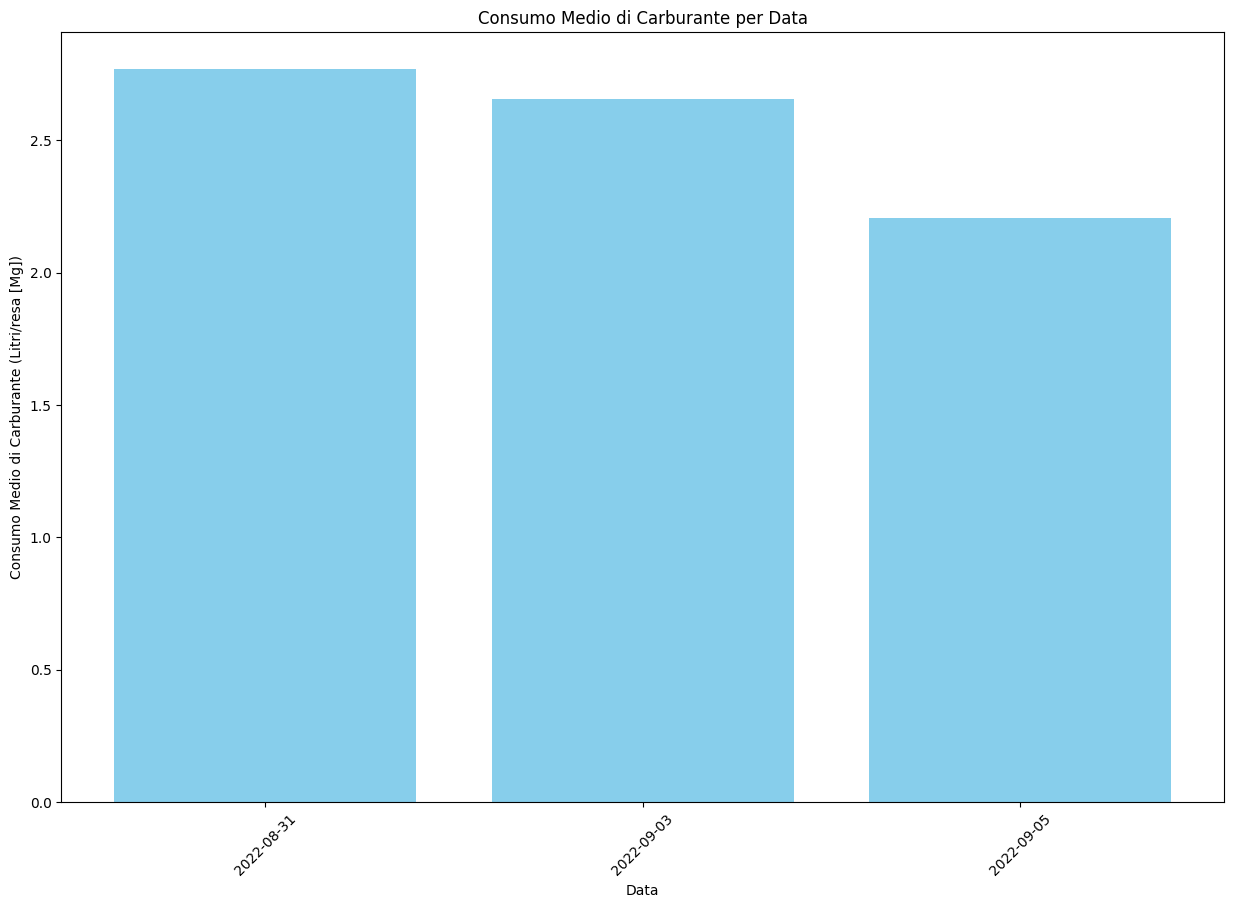

In [37]:
consumo_carburante_per_Mg = 1.15
df3['Fuel_L/Mg'] = df3['RESAMG'] * consumo_carburante_per_Mg

date_fuel_consumption = df3.groupby('Data')['Fuel_L/Mg'].mean().reset_index()
print(date_fuel_consumption)

plt.figure(figsize=(15, 10))
plt.bar(date_fuel_consumption['Data'].astype(str), date_fuel_consumption['Fuel_L/Mg'], color='skyblue')
plt.xlabel('Data')
plt.ylabel('Consumo Medio di Carburante (Litri/resa [Mg])')
plt.title('Consumo Medio di Carburante per Data')
plt.xticks(rotation=45)
plt.show()


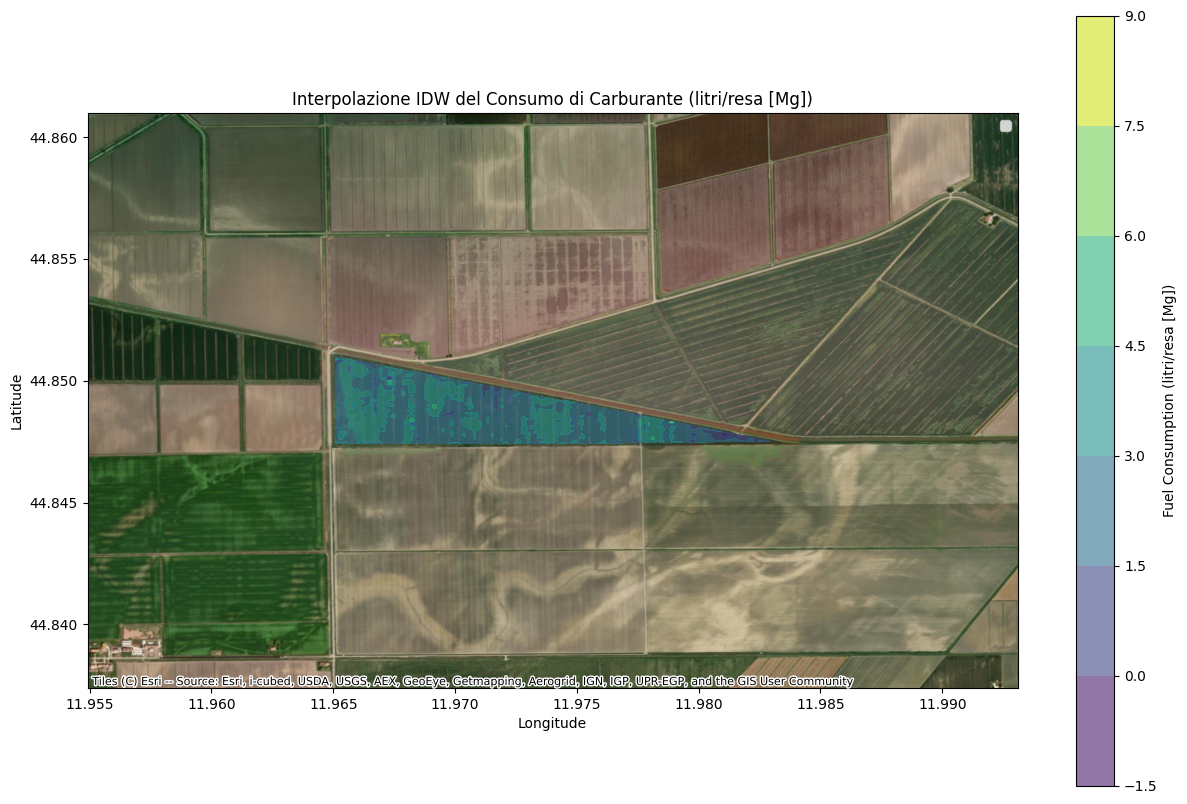

In [36]:
# Verifica che il CRS sia corretto
df3.set_crs(epsg=4326, inplace=True, allow_override=True)

# Prepara i dati per l'interpolazione
x = df3['Longitudin'].values
y = df3['Latitudine'].values
z = df3['Fuel_L/Mg'].values

# Verifica che x, y e z non siano vuoti
if x.size == 0 or y.size == 0 or z.size == 0:
    raise ValueError("Gli array x, y o z sono vuoti dopo la pulizia dei dati.")

# Funzione per l'interpolazione IDW
def idw_interpolation(x, y, z, resolution=100, power=2):
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), resolution),
        np.linspace(y.min(), y.max(), resolution)
    )
    grid_z = griddata(
        np.vstack((x, y)).T,
        z,
        (grid_x, grid_y),
        method='cubic'
    )
    return grid_x, grid_y, grid_z

# Esegui l'interpolazione IDW
grid_x, grid_y, grid_z = idw_interpolation(x, y, z)

# Creiamo una mappa utilizzando Geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotta l'interpolazione IDW
contour = ax.contourf(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.6)



# Centra la mappa sulla zona di interesse
ax.set_xlim(df3['Longitudin'].min() - 0.01, df3['Longitudin'].max() + 0.01)
ax.set_ylim(df3['Latitudine'].min() - 0.01, df3['Latitudine'].max() + 0.01)

# Aggiungiamo la mappa di sfondo
ctx.add_basemap(ax, crs=df3.crs.to_string(), source=ctx.providers.Esri.WorldImagery, zoom=16)

# Aggiungiamo una legenda e una barra dei colori
plt.colorbar(contour, ax=ax, label='Fuel Consumption (litri/resa [Mg])')
plt.legend()
plt.title('Interpolazione IDW del Consumo di Carburante (litri/resa [Mg])')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()